In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:

df.drop('customerID', axis='columns', inplace=True)




In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
# string to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# print the is null values coloumns
df[df.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
# drop the null values
df.dropna(inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.TotalCharges.dtype

dtype('float64')

In [13]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [14]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


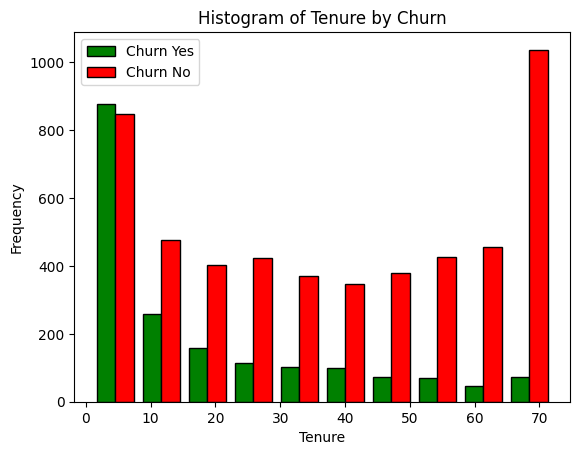

In [15]:
# Create DataFrames for churn yes and no
churn_yes = df[df['Churn'] == 'Yes'].tenure
churn_no = df[df['Churn'] == 'No'].tenure

# Plot the histogram
plt.hist([churn_yes, churn_no], bins=10, label=['Churn Yes', 'Churn No'], edgecolor='black',color=['g', 'r'])
plt.title('Histogram of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

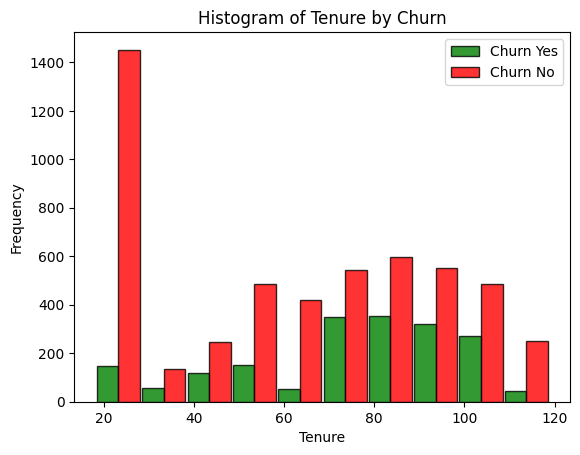

In [16]:
# Create DataFrames for churn yes and no
churn_yes = df[df['Churn'] == 'Yes'].MonthlyCharges
churn_no = df[df['Churn'] == 'No'].MonthlyCharges

# Plot the histogram
plt.hist([churn_yes, churn_no], bins=10, label=['Churn Yes', 'Churn No'], edgecolor='black',color=['g', 'r'],rwidth=0.95, alpha=0.8)
plt.title('Histogram of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
# print all the categorical data
df.select_dtypes(include='object').columns



Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [19]:
# create a fuction for this which are the categorical
def categorical_columns(df):
    categorical_col = df.select_dtypes(include='object').columns
    for column in categorical_col:
        print(f'{column} : {df[column].unique()}')

In [20]:
categorical_columns(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
# replace the all the categorical data with one hot encoding
df.replace('No internet service','No', inplace=True)
df.replace('No phone service', 'No',inplace=True)


In [22]:

categorical_columns(df)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
# select all colums with yes and no values and replace them with 1 and 0
# make array of coloums with yes and no
yes_no_coloums = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling','StreamingMovies', 'Churn']


for col in yes_no_coloums:
    df[col].replace({'Yes':1, 'No':0}, inplace=True)

/tmp/ipykernel_59646/1969446057.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes':1, 'No':0}, inplace=True)
/tmp/ipykernel_59646/1969446057.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({'Yes':1, 'No':0}, inplace=True)


In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
categorical_columns(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
# using encoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(df.gender)
df['gender'] = label

In [27]:
# replace male and female with 1 and 0

#df['gender'].replace({'Male':1, 'Female':0}, inplace=True)


In [28]:
categorical_columns(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
# make dummies 
df = pd.get_dummies(data=df, columns=['InternetService','PaymentMethod','Contract'], dtype=int)

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [32]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [33]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
1321,1,0,1,1,60,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
5827,1,0,1,1,34,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3048,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [34]:
# scale the data in to 0 to 1
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [35]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [36]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [37]:
# split the data to featues and target
X = df.drop('Churn',axis=1)
Y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5)

In [39]:
X.shape,X_test.shape,Y_test.shape, Y_train.shape

((7032, 26), (1407, 26), (1407,), (5625,))

In [40]:
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1 , activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])

2025-01-08 11:07:08.067745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736314628.087260   59646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736314628.093048   59646 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-08 11:07:08.112401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do 

In [41]:
model.fit(X_train,Y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4070 - loss: 0.8306
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7727 - loss: 0.4820
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7881 - loss: 0.4398
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7963 - loss: 0.4285
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4160
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.4263
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4162
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8042 - loss: 0.4100
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4235
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.3966
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4172
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [42]:
#evaluvate the model
model.evaluate(X_test,Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.4353


[0.4453018605709076, 0.7917554974555969]

In [43]:
y_p = model.predict(X_test)
y_p[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.151269  ],
       [0.489268  ],
       [0.011966  ],
       [0.77517277],
       [0.5693018 ]], dtype=float32)

In [44]:
y_predict = []
for element in y_p:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [45]:
y_predict[:5]
len(y_predict)

1407

In [46]:
Y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.54      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'actual')

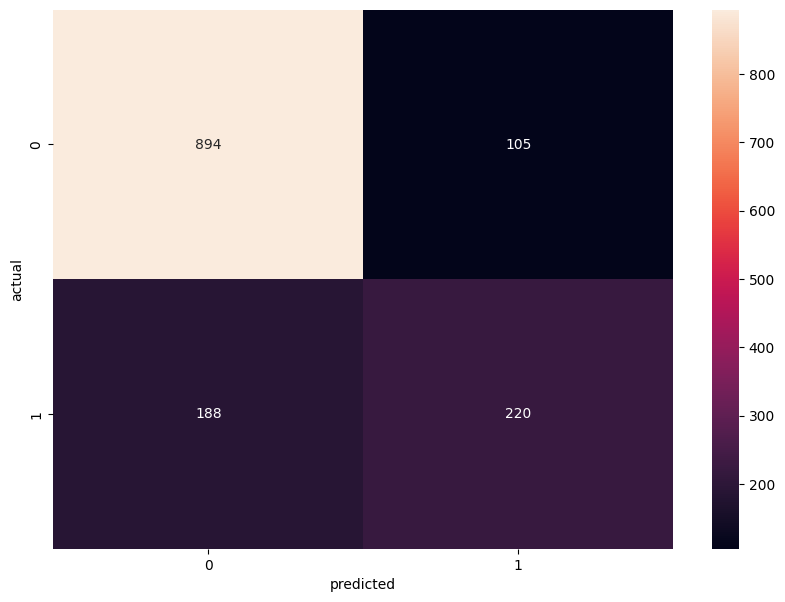

In [48]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [49]:
accuracy = (891+221)/1407
accuracy


0.7903340440653873

In [50]:
precision_1= 891/(891+221)
precision_1

0.8012589928057554

In [51]:
precision_2= 221/(108+221)
precision_2

0.6717325227963525

In [52]:
def ANN(X_train, Y_train, X_test, Y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, Y_train, epochs=100)
    else:
        model.fit(X_train, Y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, Y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(Y_test, y_preds))
    
    return y_preds

# method 1: under sampling

In [53]:
y_preds = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.5757
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8102 - loss: 0.4075
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.3992
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4147
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8047 - loss: 0.4054
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.3992
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8086 - loss: 0.4081
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8093 - loss: 0.4135
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8112 - loss: 0.4077
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7955 - loss: 0.4177
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4109
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,0,0,1,0,1,0
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [55]:
# count the classifications in Churn column
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [57]:
# create a dataframe for the 0  and 1
df_0 = df[df['Churn'] == 0]
df_1 = df[df['Churn'] == 1]
df_0.shape, df_1.shape

((5163, 27), (1869, 27))

In [58]:
# count the values new created dataframes
count_df_0 , count_df_1 = df.Churn.value_counts()

In [60]:
count_df_0, count_df_1

(5163, 1869)

In [61]:
df_0.shape

(5163, 27)

In [62]:
df_1.shape

(1869, 27)

In [64]:
count_df_0_undersample = df_0.sample(count_df_1)

In [65]:
count_df_0_undersample.shape

(1869, 27)

In [70]:
# concatenate the dataframes
df_undersample = pd.concat([count_df_0_undersample, df_1], axis=0)
df_undersample.shape

print("randome undersampling")

df_undersample['Churn'].value_counts()


randome undersampling


Churn
0    1869
1    1869
Name: count, dtype: int64

In [73]:
X = df_undersample.drop('Churn',axis=1)
Y = df_undersample['Churn']

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5, stratify=Y)
#here we concanated the dataframes so we need to stratify

In [74]:
Y_train.value_counts()

Churn
1    1495
0    1495
Name: count, dtype: int64

In [75]:
y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6275 - loss: 0.6501
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7503 - loss: 0.5173
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7494 - loss: 0.5108
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 0.5052
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.4863
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7679 - loss: 0.4788
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7645 - loss: 0.4792
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.4704
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7693 - loss: 0.4749
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7662 - loss: 0.4801
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4594
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - lo

# Method 2: Over Sampling

In [76]:
count_df_0, count_df_1

(5163, 1869)

In [78]:
df_0.shape, df_1.shape

((5163, 27), (1869, 27))

In [80]:
# create duplicate of datas in df_1 
df_1_oversample = df_1.sample(count_df_0, replace=True)
df_1_oversample.shape

(5163, 27)

In [81]:
# so need to concatenate the dataframes df_0 and df_1_oversample
df_oversample = pd.concat([df_0, df_1_oversample], axis=0)
df_oversample.shape

print("random oversampling")
df_oversample['Churn'].value_counts()

random oversampling


Churn
0    5163
1    5163
Name: count, dtype: int64

In [82]:
X = df_oversample.drop('Churn',axis=1)
Y = df_oversample['Churn']

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5, stratify=Y)
#here we concanated the dataframes so we need to stratify

In [83]:
Y_train.value_counts()


Churn
0    4130
1    4130
Name: count, dtype: int64

In [84]:
y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6566 - loss: 0.6090
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7631 - loss: 0.4894
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7691 - loss: 0.4777
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7624 - loss: 0.4844
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7686 - loss: 0.4784
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7669 - loss: 0.4788
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7751 - loss: 0.4737
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.4703
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7616 - loss: 0.4812
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7639 - loss: 0.4865
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7684 - loss: 0.4711
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Method 3: SMOT

In [87]:
# split the data to featues and target
X = df.drop('Churn',axis=1)
Y = df['Churn']

Y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE(sampling_strategy='minority')
X_smote, Y_smote = smote.fit_resample(X, Y)
Y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [94]:

X_train,X_test,Y_train, Y_test = train_test_split(X_smote,Y_smote, test_size=0.2, random_state=5, stratify=Y_smote)
#here we concanated the dataframes so we need to stratify

In [95]:
Y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [97]:
Y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [98]:
y_pred = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6286 - loss: 0.6371
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7605 - loss: 0.4901
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7724 - loss: 0.4779
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7742 - loss: 0.4685
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7740 - loss: 0.4671
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.4700
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.4574
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7810 - loss: 0.4583
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.4552
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.4435
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7874 - loss: 0.4447
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Method 4: Use of Ensemble with under sampling


In [99]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [100]:
# split the data to featues and target
X = df.drop('Churn',axis=1)
Y = df['Churn']

Y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [101]:

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=5, stratify=Y)
#here we concanated the dataframes so we need to stratify

In [103]:
Y_train.value_counts(), X_train.shape

(Churn
 0    4130
 1    1495
 Name: count, dtype: int64,
 (5625, 26))

In [106]:
4130/1495, 4130/3

(2.762541806020067, 1376.6666666666667)

In [108]:
df = X_train.copy()
df['Churn'] = Y_train

In [109]:
# create a dataframe for the 0  and 1
df_0 = df[df['Churn'] == 0]
df_1 = df[df['Churn'] == 1]
df_0.shape, df_1.shape

((4130, 27), (1495, 27))

In [113]:
df_0[:1495].shape

(1495, 27)

In [115]:
# ensemble

def get_batch(df_majority, df_minority, start, end):
    Y_train = pd.concat([df_majority[start:end+1], df_minority], axis=0)
    
    X_train = Y_train.drop('Churn',axis=1)
    Y_train = Y_train['Churn']
    
    return X_train, Y_train

In [117]:
X_train, Y_train = get_batch(df_0, df_1, 0, 1495)
X_train.shape, Y_train.shape

((2991, 26), (2991,))

In [118]:
y_pred1 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6167 - loss: 0.6527
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5361
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7444 - loss: 0.5085
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5059
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5021
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7590 - loss: 0.5021
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7538 - loss: 0.4985
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7637 - loss: 0.4821
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.5075
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7758 - loss: 0.4713
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 0.4866
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7768 - lo

In [121]:
X_train, Y_train = get_batch(df_0, df_1, 1495, 1495*2)
X_train.shape, Y_train.shape
y_pred2 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6435 - loss: 0.6391
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.5116
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - loss: 0.5057
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7721 - loss: 0.4829
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7571 - loss: 0.4940
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7637 - loss: 0.4961
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.4891
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.4772
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.4739
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7780 - loss: 0.4759
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7874 - loss: 0.4673
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - lo

In [122]:
X_train, Y_train = get_batch(df_0, df_1, 1491495*25, 1495*3)
X_train.shape, Y_train.shape
y_pred3 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6093 - loss: 0.6204 
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0577
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0095
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0026
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.3149e-04
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4454e-04
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.8726e-04
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2768e-04
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [124]:
vote_1 = 1
vote_2 = 0
vote_3 = 0

vote_1+vote_2+vote_3

1

In [126]:
len(y_pred1)
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    votes = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if votes > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0
        

In [127]:
print(classification_report(Y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1033
           1       0.47      0.85      0.61       374

    accuracy                           0.71      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.71      0.72      1407

